# Homework 1

## Imports

In [ ]:
import statistics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

## Dataset analysis

Since I'll use some algorithms that are sensitive to feature's scale (like PCA) I'll perform scaling right away.

In [ ]:
wine = load_wine()
scaled_wine_data = StandardScaler().fit_transform(wine['data'])
data = pd.DataFrame(
    data=np.c_[scaled_wine_data, wine['target']],
    columns=wine['feature_names'] + ['target']
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0.0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0.0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0.0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0.0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0.0


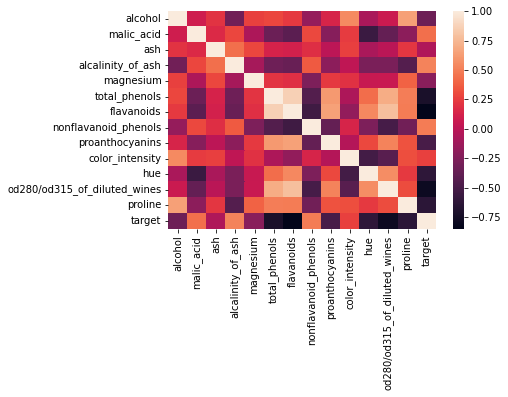

In [ ]:
correlations = data.corr()
sns.heatmap(correlations)
plt.show()

Since there is some correlation between features (for example between flavanoids and nonflavanoid_phenols), I'll try to remove some of them.

In [ ]:
features = list(data.columns)
features.remove('target')
x = data.loc[:, features].values
y = data.loc[:, ['target']].values
x = pd.DataFrame(x, columns=features)
y = pd.DataFrame(y, columns=['target'])

In [ ]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=9)
x = rfe.fit_transform(x, y)  
x = pd.DataFrame(x, columns=rfe.feature_names_in_[rfe.support_])
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,total_phenols,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,0.808997,1.034819,0.251717,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.568648,0.733629,-0.293321,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.808997,1.215533,0.269020,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,2.491446,1.466525,1.186068,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,0.808997,0.663351,-0.319276,0.449601,-0.037874


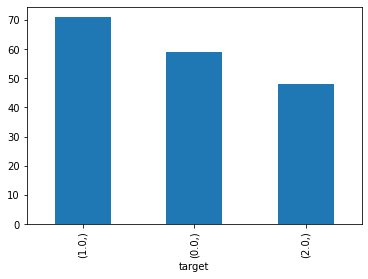

In [ ]:
y.value_counts().plot(kind='bar')

Dataset is balanced enough - no extra action needed.



## Data visualisation

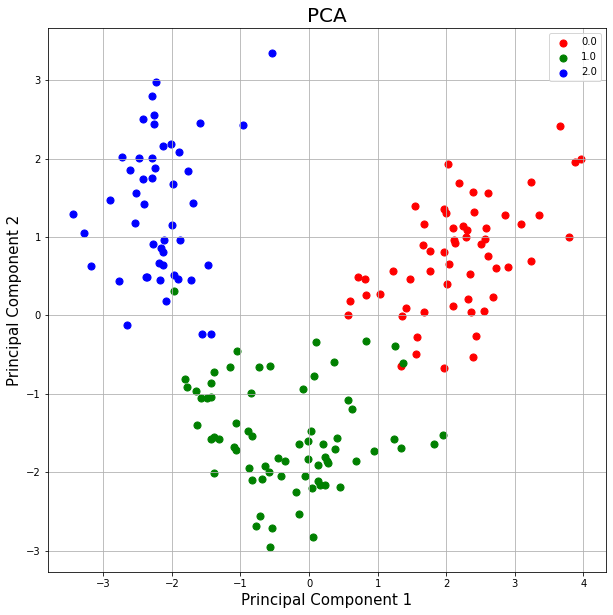

In [ ]:
pca = PCA(n_components=2)
res = pca.fit_transform(x)

res = pd.DataFrame(data=res, columns=['PC 1', 'PC 2'])
res = pd.concat([res, y], axis=1)
# res.head()

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('PCA', fontsize=20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = res['target'] == target
    ax.scatter(
        res.loc[indicesToKeep, 'PC 1'],
        res.loc[indicesToKeep, 'PC 2'],
        c=color,
        s=50
    )
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


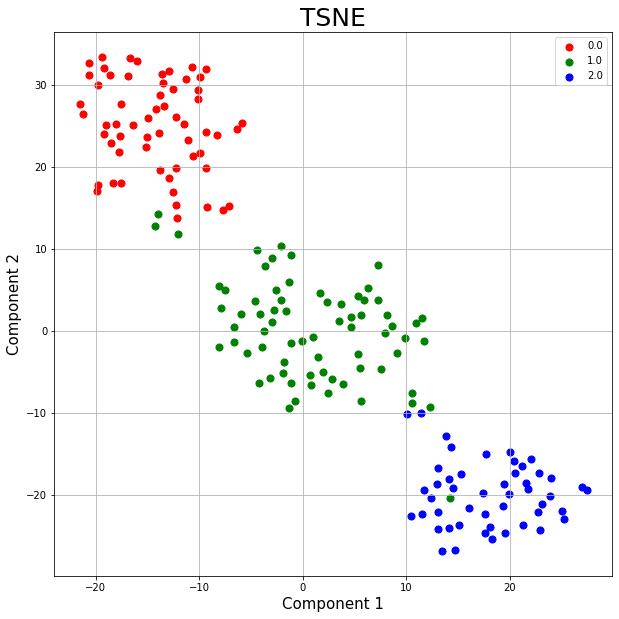

In [ ]:
res = TSNE(n_components=2, perplexity=15).fit_transform(x)
res = pd.DataFrame(data=res, columns=['C 1', 'C 2'])
res = pd.concat([res, y], axis = 1)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Component 1', fontsize=15)
ax.set_ylabel('Component 2', fontsize=15)
ax.set_title('TSNE', fontsize=25)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = res['target'] == target
    ax.scatter(
        res.loc[indicesToKeep, 'C 1'],
        res.loc[indicesToKeep, 'C 2'],
        c=color,
        s=50
    )
ax.legend(targets)
ax.grid()

We can see that classes are nicely separated. Therefore I expect good results from models.

## Models

I'll compare predictions from k-nearest neighbors classifier, gradient boosting classifier and multi-layer perceptron classifier.

In [ ]:
skf = StratifiedKFold(n_splits=10)

### K-Nearest Neighbors

In [ ]:
scores = []

for train_index, test_index in skf.split(x, y):
    x_train = x.loc[train_index]
    x_test = x.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train.values.ravel())
    scores.append(model.score(x_test, y_test))

print(f'Average score: {statistics.mean(scores)}')

Average score: 0.9663398692810458


### Gradient Boosting Classifier

In [ ]:
scores = []

for train_index, test_index in skf.split(x, y):
    x_train = x.loc[train_index]
    x_test = x.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model = GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=1.0,
        max_depth=1,
        random_state=0
    ).fit(x_train, y_train.values.ravel())
    scores.append(model.score(x_test, y_test))

print(f'Average score: {statistics.mean(scores)}')

Average score: 0.9722222222222222


### Multi-layer Perceptron

In [ ]:
scores = []

for train_index, test_index in skf.split(x, y):
    x_train = x.loc[train_index]
    x_test = x.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model = MLPClassifier(
        random_state=1,
        max_iter=1000
    ).fit(x_train, y_train.values.ravel())
    scores.append(model.score(x_test, y_test))

print(f'Average score: {statistics.mean(scores)}')

Average score: 0.9888888888888889


As predicted, models achive very good accuracy during test phase. Based on accuracy multi-layer perceptron with 100 neurons in hidden layer was the best  (almost 99% accuracy on test set). Other two scored around 97% accuracy, but gradient boosting classifier was a little better. Small differences in results probably occured because dataset was relatively easy and all models performed very well. Furthermore since models achieved similar results changes in feature preprocessing or better tuning may change overall comparison. I decided to leave those results, since mostly default parameters were used, with are usually reasonable, and none of the models was tuned more then the rest.

In future tasks, if given full freedom, I'll use multi-layer perceptron. For tree-based ensemble model I'll obviously use gradient boosting classifier, since that's the only model from this category.